In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

В файле test_1 лежит результат теста. (target - какая-то целевая метрика)

Изучите результаты теста и сделайте вывод (проверяем гипотезу о равенстве средних). В качестве решения - ноутбук, в котором построено распределение параметра target в группах и проверены нужные критерии.

In [3]:
df = pd.read_csv("test_1.csv")

In [8]:
df

,group,client_id,target
0,test,1,48.294046
1,test,2,50.561098
2,test,3,50.987911
3,test,4,47.819840
4,test,5,50.153417
...,...,...,...
1993,control,1994,50.207788
1994,control,1995,51.715447
1995,control,1996,56.551077
1996,control,1997,47.178478


In [19]:
groups = df['group'].unique()
for group in groups:
    W_value, p_value = stats.shapiro(df[df['group']==group]['target'])
    if p_value > 0.01:
        print('Normal','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Not normal','W=',round(W_value,4),'p-value',round(p_value,4))

Normal W= 0.998 p-value 0.2941
Normal W= 0.9992 p-value 0.9479


Значения имеют нормальное распределение.

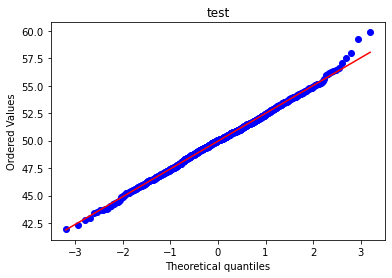

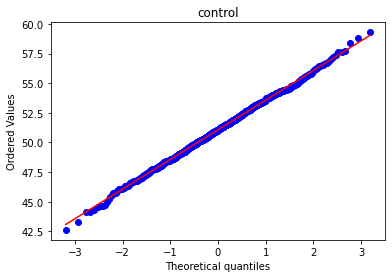

In [20]:
for group in groups:
    stats.probplot(df[df['group']==group]['target'], dist="norm", plot=plt)
    plt.title(group)
    plt.show()

In [27]:
stats.fligner(df[df['group']=='test']['target'],df[df['group']=='control']['target'], center='mean')

FlignerResult(statistic=0.0806259473132208, pvalue=0.7764509319188543)

pvalue>0.05 => Гипотезу о равенстве дисперсий принимаем.

In [22]:
t2, p2 = stats.ttest_ind(df[df['group']=='test']['target'],df[df['group']=='control']['target'])


if p2 > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t2,'\np-value =',p2)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t2,'\np-value =',p2)

Есть статистически значимая разница 
t - критерий =  -9.878332719470977 
p-value = 1.6802013491386015e-22


Как видно из проведенного t-теста, разница в средних значениях статистически значима.

In [24]:
for group in groups:
    print("Среднее для",group,"=",df[df['group']==group]['target'].mean())

Среднее для test = 49.95894395407758
Среднее для control = 51.067378748698374


**Среднее значение для тестовой выборки уменьшилось**